In [663]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import r2_score

In [664]:
df = pd.read_csv("car data.csv")

In [665]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [666]:
df["Car_Name"].unique().size

98

In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [668]:
df["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [669]:
df.shape

(301, 9)

In [670]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [671]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [672]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

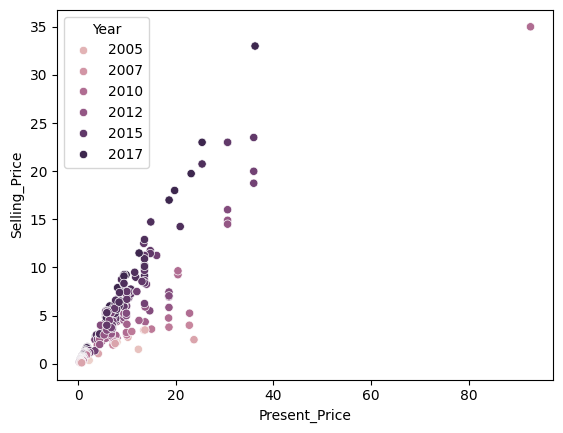

In [673]:
sns.scatterplot(y = df["Selling_Price"], x = df["Present_Price"], hue=df["Year"])

<Axes: xlabel='Driven_kms', ylabel='Present_Price'>

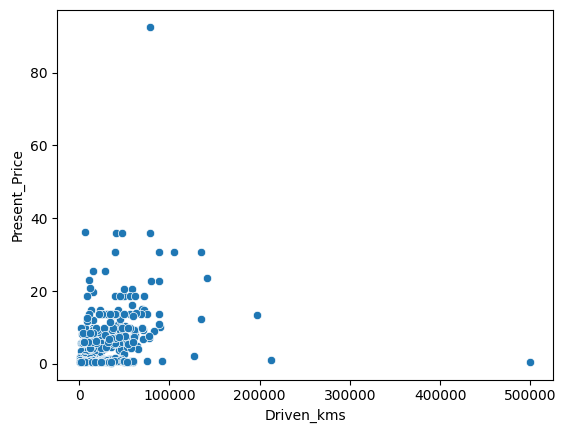

In [674]:
sns.scatterplot(y = df["Present_Price"], x = df["Driven_kms"])

In [675]:
df["Selling_Price"] = np.log(df['Selling_Price'])

In [676]:
df["Present_Price"] = np.log(df["Present_Price"])

In [677]:
df["Driven_kms"] = np.log(df["Driven_kms"])

<Axes: xlabel='Selling_Price', ylabel='Count'>

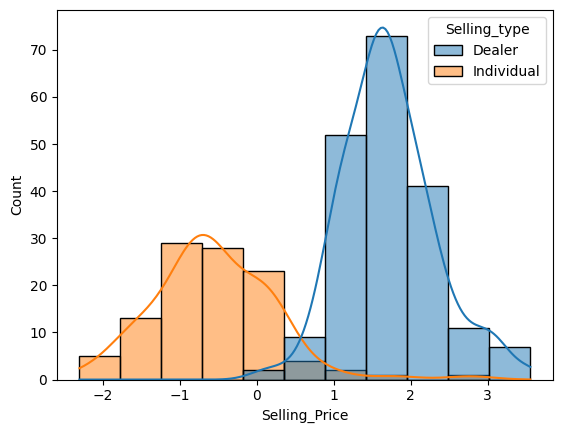

In [678]:
sns.histplot(data=df, x = "Selling_Price", kde= True, hue = "Selling_type")

<Axes: xlabel='Present_Price', ylabel='Count'>

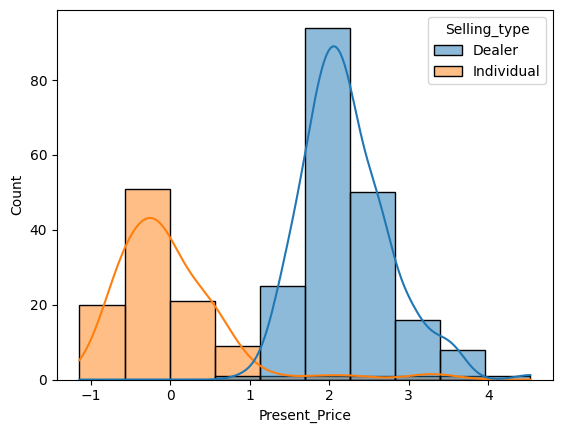

In [679]:
sns.histplot(data=df, x = "Present_Price", kde= True, hue = "Selling_type")

<Axes: xlabel='Driven_kms', ylabel='Count'>

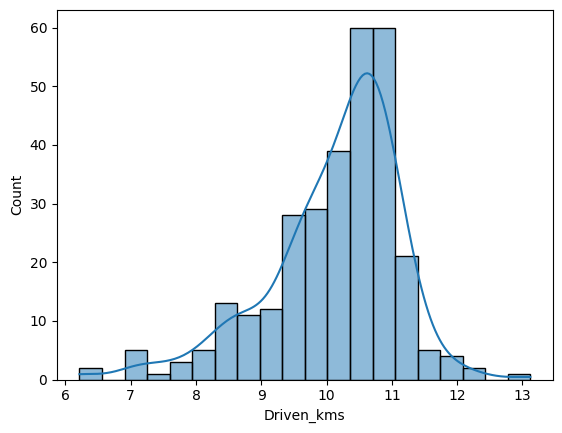

In [680]:
sns.histplot(data=df, x = "Driven_kms", kde= True)

<Axes: xlabel='count', ylabel='Fuel_Type'>

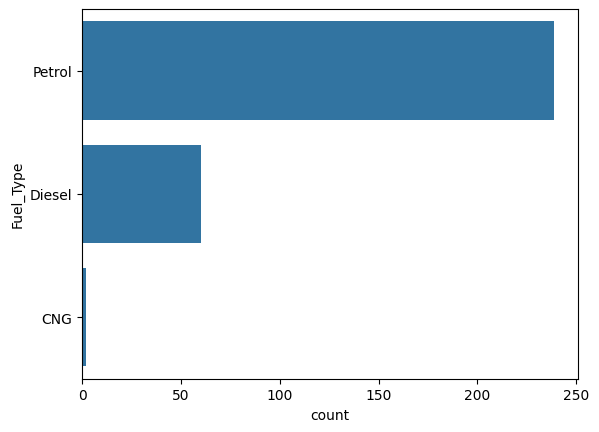

In [681]:
sns.countplot(df['Fuel_Type'])

<Axes: xlabel='count', ylabel='Selling_type'>

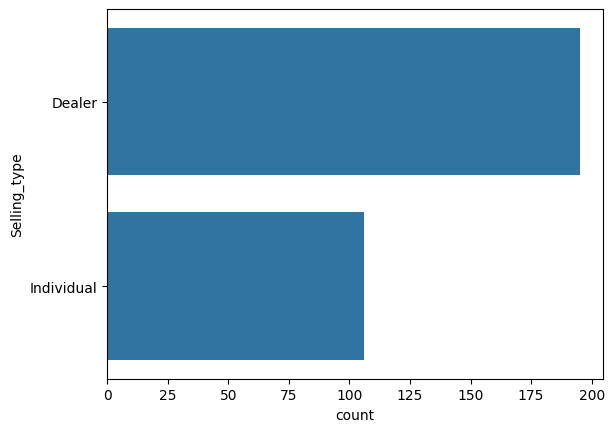

In [682]:
sns.countplot(df['Selling_type'])

<Axes: xlabel='count', ylabel='Transmission'>

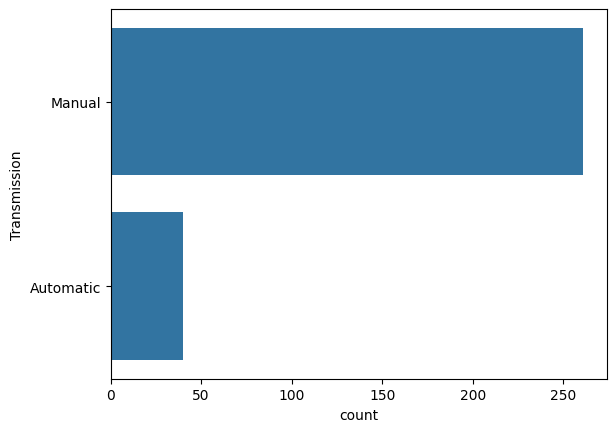

In [683]:
sns.countplot(df['Transmission'])

In [684]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.272282,0.000249,-0.545249,-0.182104
Selling_Price,0.272282,1.000000,0.949709,0.170268,-0.117410
Present_Price,0.000249,0.949709,1.000000,0.357448,-0.027368
Driven_kms,-0.545249,0.170268,0.357448,1.000000,0.074260
Owner,-0.182104,-0.117410,-0.027368,0.074260,1.000000


<Axes: >

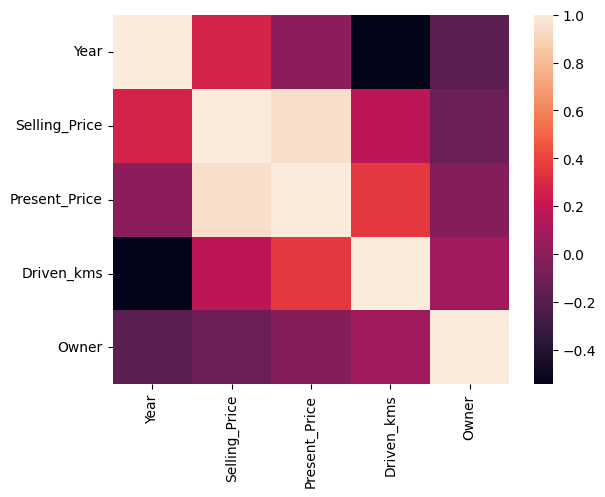

In [685]:
sns.heatmap(df.corr(numeric_only=True))

In [686]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,1.208960,1.720979,10.203592,Petrol,Dealer,Manual,0
1,sx4,2013,1.558145,2.255493,10.668955,Diesel,Dealer,Manual,0
2,ciaz,2017,1.981001,2.287471,8.839277,Petrol,Dealer,Manual,0
3,wagon r,2011,1.047319,1.423108,8.556414,Petrol,Dealer,Manual,0
4,swift,2014,1.526056,1.927164,10.656082,Diesel,Dealer,Manual,0


In [687]:
df["Cae_Age"] = 2025 - df["Year"]

In [688]:
df.drop(columns=["Year", "Car_Name"], inplace=True)

In [689]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Cae_Age
0,1.208960,1.720979,10.203592,Petrol,Dealer,Manual,0,11
1,1.558145,2.255493,10.668955,Diesel,Dealer,Manual,0,12
2,1.981001,2.287471,8.839277,Petrol,Dealer,Manual,0,8
3,1.047319,1.423108,8.556414,Petrol,Dealer,Manual,0,14
4,1.526056,1.927164,10.656082,Diesel,Dealer,Manual,0,11


In [690]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), ['Fuel_Type', 'Selling_type', 'Transmission'])
], remainder='passthrough')

In [691]:
x = ct.fit_transform(df[['Fuel_Type', 'Selling_type', 'Transmission']])

In [692]:
ct["encoder"].get_feature_names_out()

array(['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'], dtype=object)

In [693]:
df[ct["encoder"].get_feature_names_out()] = x

In [694]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Cae_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,1.208960,1.720979,10.203592,Petrol,Dealer,Manual,0,11,0.0,1.0,0.0,1.0
1,1.558145,2.255493,10.668955,Diesel,Dealer,Manual,0,12,1.0,0.0,0.0,1.0
2,1.981001,2.287471,8.839277,Petrol,Dealer,Manual,0,8,0.0,1.0,0.0,1.0
3,1.047319,1.423108,8.556414,Petrol,Dealer,Manual,0,14,0.0,1.0,0.0,1.0
4,1.526056,1.927164,10.656082,Diesel,Dealer,Manual,0,11,1.0,0.0,0.0,1.0


In [695]:
df.drop(columns=["Fuel_Type", "Selling_type", "Transmission"], inplace = True)

<Axes: ylabel='Driven_kms'>

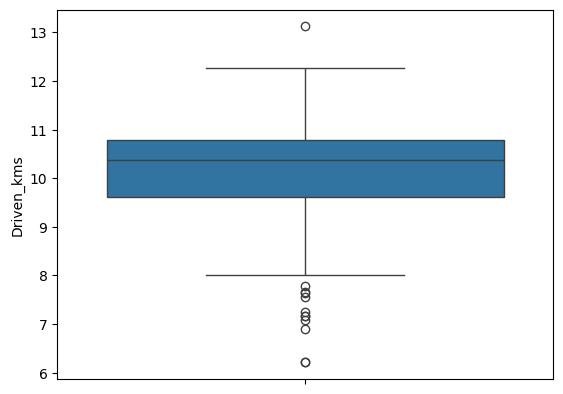

In [696]:
sns.boxplot(df["Driven_kms"])

In [697]:
iqr = df["Driven_kms"].quantile(0.75) - df["Driven_kms"].quantile(0.25)

u = df["Driven_kms"].quantile(0.75) + iqr*1.5
l = df["Driven_kms"].quantile(0.25) - iqr*1.5

df = df[(df["Driven_kms"] < u) & (df["Driven_kms"] > l)]


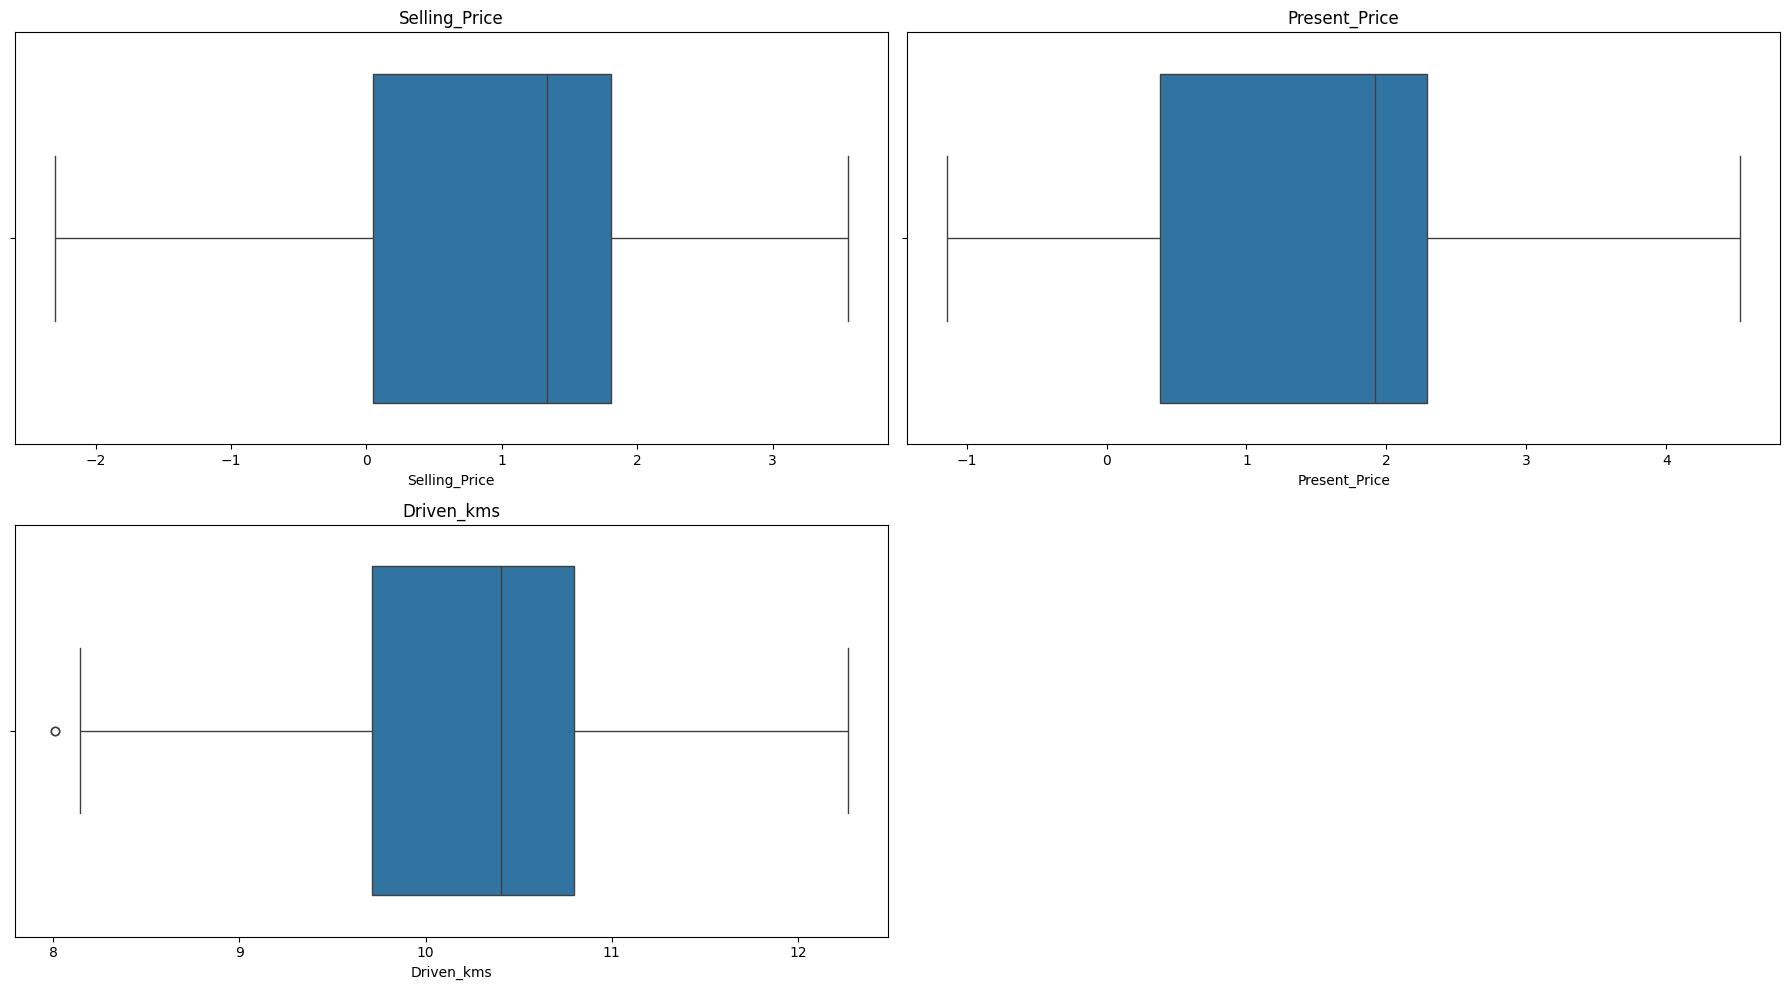

In [698]:
numerical_features = ['Selling_Price', 'Present_Price', 'Driven_kms']

plt.figure(figsize=(18, 10))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.boxplot(data = df, x = feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [699]:
x = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

In [700]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42)

In [701]:
xtest

,Present_Price,Driven_kms,Owner,Cae_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
48,2.042518,10.160839,0,10,0.0,1.0,0.0,1.0
164,-0.616186,9.546813,0,9,0.0,1.0,1.0,1.0
286,2.066863,10.260077,0,9,0.0,1.0,0.0,1.0
45,2.488234,9.615805,0,11,0.0,1.0,0.0,0.0
192,-0.287682,10.799576,1,18,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
95,2.923699,11.184421,0,13,0.0,1.0,0.0,1.0
17,2.378620,10.668955,0,9,1.0,0.0,0.0,1.0
12,2.296567,9.615805,0,10,0.0,1.0,0.0,0.0
218,2.128232,10.716150,0,11,0.0,1.0,0.0,1.0


In [702]:
model = LinearRegression()

In [703]:
model.fit(xtrain, ytrain)

LinearRegression()

In [704]:
model.score(xtest, ytest)

0.9852219158471687

In [705]:
score = cross_val_score(model, x, y, cv=5, scoring="r2")
score

array([0.94220838, 0.95861674, 0.7012428 , 0.97714519, 0.90339217])

In [706]:
score.mean()

np.float64(0.8965210563564575)

<Axes: xlabel='Selling_Price'>

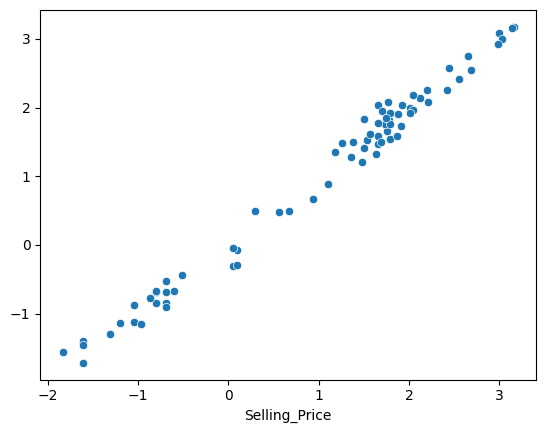

In [707]:
sns.scatterplot(x = ytest, y =  model.predict(xtest))